Python Exercise 2:
Samuel Statton

In [0]:
import pandas as pd
import statsmodels.api as sm 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import linear_model

In [0]:
DATA_URL = 'http://128.138.93.164/aprd6342/data/TravelPonyFacebook.csv'
df = pd.read_csv(DATA_URL)

In [0]:
## Removing 0's ##
travelpony = df[(df != 0).all(1)]
travelpony.head()

,Start Date,End Date,Account,Campaign Name,Reach,Frequency,Impressions,Clicks,Unique Clicks,Amount Spent (USD),Page Likes,Page Engagement,Post Engagement,Post Likes,Post Comments,Post Shares,Photo Views,Website Clicks,Cost per Page Like (USD),Cost per Page Engagement (USD)
16,2013-11-08,2013-11-08,Bob Jackson,"Post: ""You need to get some real sun and we ar...",8466,1.018663,8624,273,238,42.73,4,276,272,96,1,18,156,1,10.682500,0.154819
356,2013-10-02,2013-10-02,Bob Jackson,Nanigans_2_648,4905,1.004893,4929,37,30,46.96,12,38,26,5,1,1,2,17,3.913333,1.235789
467,2013-09-30,2013-09-30,Bob Jackson,Simple_Multi_Fill_Campaign_2_583,6710,1.000000,6710,35,30,55.22,7,37,30,7,1,3,4,15,7.888571,1.492432
775,2013-09-26,2013-09-26,Bob Jackson,Simple_Multi_Fill_Campaign_2_583,8750,1.007657,8817,65,55,100.92,16,85,69,14,4,3,16,32,6.307500,1.187294
842,2013-09-24,2013-09-24,Bob Jackson,Simple_Multi_Fill_Campaign_1_341,9296,1.000000,9296,21,18,41.20,3,39,36,1,2,2,19,12,13.733333,1.056410


Question 1:

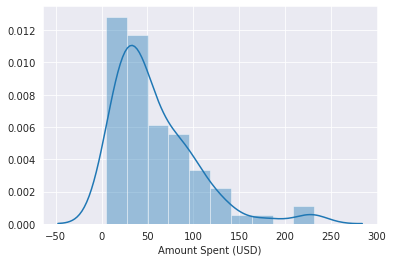

In [0]:
## Amount Spent Histogram ##
sns.set_style('darkgrid')
sns.distplot(travelpony['Amount Spent (USD)'])

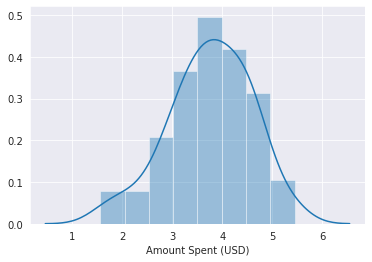

In [0]:
## Log Amount Spent ##
sns.set_style('darkgrid')
sns.distplot(np.log(travelpony['Amount Spent (USD)']))
## As a result, this distribution looks much more normal ##

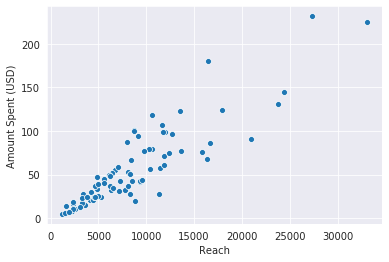

In [0]:
## Scatter Plots ##
sns.scatterplot(travelpony['Reach'], travelpony['Amount Spent (USD)'])
## Looking linear ##

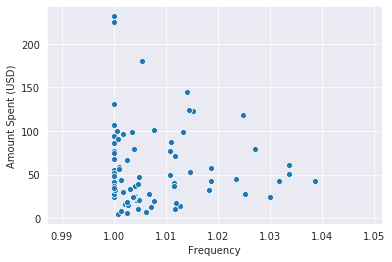

In [0]:
sns.scatterplot(travelpony['Frequency'], travelpony['Amount Spent (USD)'])
## Frequency is looking a bit strange due to it's nature of always being >= 1.0 ##

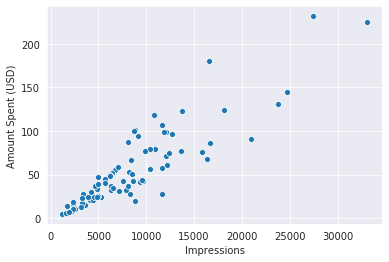

In [0]:
sns.scatterplot(travelpony['Impressions'], travelpony['Amount Spent (USD)'])
## Looking most linear ##

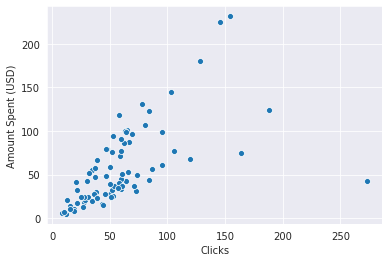

In [0]:
sns.scatterplot(travelpony['Clicks'], travelpony['Amount Spent (USD)'])
## Looking linear ##

Overall, the scatterplots do not give major cause for concern. There are outliers that may have greater leverage on the regression performed in question 2, but it is acceptable for now. 

Question 2:

In [0]:
data = travelpony[["Campaign Name", "Reach", "Frequency", "Impressions", "Clicks", "Unique Clicks", "Page Likes", "Page Engagement", "Post Engagement","Post Likes","Post Comments", "Post Shares", "Photo Views", "Website Clicks"]]
dummycols = pd.get_dummies(travelpony['Campaign Name'])
travelpony = travelpony.join(dummycols)

In [0]:
## SKLearn Multiple Regression ## 
target = travelpony["Amount Spent (USD)"]
features= list(range(4,9,1))+list(range(10,18,1))+list(range(20,65,1))
xcols = travelpony.iloc[:,features]
sm.OLS(target, xcols).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     Amount Spent (USD)   R-squared (uncentered):                   0.983
Model:                            OLS   Adj. R-squared (uncentered):              0.942
Method:                 Least Squares   F-statistic:                              24.10
Date:                Thu, 21 Nov 2019   Prob (F-statistic):                    5.43e-12
Time:                        00:16:31   Log-Likelihood:                         -290.14
No. Observations:                  79   AIC:                                      692.3
Df Residuals:                      23   BIC:                                      825.0
Df Model:                          56                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================================================
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
Reach                                                           0.0106      0.033      0.325      0.748      -0.057       0.078
Frequency                                                       9.1370     19.738      0.463      0.648     -31.695      49.969
Impressions                                                    -0.0063      0.033     -0.192      0.849      -0.074       0.061
Clicks                                                         -1.6498      1.032     -1.599      0.124      -3.785       0.485
Unique Clicks                                                   1.1475      0.799      1.437      0.164      -0.504       2.799
Page Likes                                                      0.8986      0.742      1.212      0.238      -0.636       2.433
Page Engagement                                                 0.9890      0.490      2.019      0.055      -0.024       2.002
Post Engagement                                                 0.0905      0.598      0.151      0.881      -1.147       1.328
Post Likes                                                      0.0532      1.347      0.040      0.969      -2.733       2.839
Post Comments                                                   0.4624      3.539      0.131      0.897      -6.859       7.783
Post Shares                                                     0.2616      2.604      0.100      0.921      -5.126       5.649
Photo Views                                                    -0.9153      0.861     -1.063      0.299      -2.696       0.866
Website Clicks                                                  0.2286      1.090      0.210      0.836      -2.027       2.484
Nanigans_2_648                                                -10.5709     22.499     -0.470      0.643     -57.114      35.972
Post: "You need to get some real sun and we are here to..."     5.9559    109.496      0.054      0.957    -220.553     232.465
Simple_Multi_Fill_Campaign_1_238                               12.9472     33.789      0.383      0.705     -56.951      82.845
Simple_Multi_Fill_Campaign_1_240                              -17.8127     24.767     -0.719      0.479     -69.047      33.422
Simple_Multi_Fill_Campaign_1_241                              -11.6070     29.123     -0.399      0.694     -71.852      48.638
Simple_Multi_Fill_Campaign_1_243                              -18.6019     25.469     -0.730      0.473     -71.288      34.084
Simple_Multi_Fill_Campaign_1_247                              -13.5660     31.327     -0.433      0.669     -78.370      51.238
Simple_Multi_Fill_Campaign_1_251        

Question 3:
Ignoring the Campaign Names, the most important variables are Frequency, Unique Clicks, and Page Engagement. This model has a large r squared value, but the standard error for the campaign names are large and the model should be taken with a grain of salt. Below is a regression with no campaign names and redicting log amount spent, the r-squared lowered by 0.01 points. At the same time, the p-values mostly indicate that only frequency is significant at the 5% level.


In [0]:
target = np.log(travelpony["Amount Spent (USD)"])
features= list(range(4,9,1))+list(range(10,18,1))
xcols = travelpony.iloc[:,features]
sm.OLS(target, xcols).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     Amount Spent (USD)   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              564.4
Date:                Thu, 21 Nov 2019   Prob (F-statistic):                    3.07e-62
Time:                        00:16:34   Log-Likelihood:                         -39.726
No. Observations:                  79   AIC:                                      101.5
Df Residuals:                      68   BIC:                                      127.5
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Reach              -0.0002      0.001     -0.433      0.666      -0.001       0.001
Frequency           2.4622      0.131     18.797      0.000       2.201       2.724
Impressions         0.0003      0.001      0.568      0.572      -0.001       0.001
Clicks              0.0171      0.012      1.408      0.164      -0.007       0.041
Unique Clicks      -0.0100      0.012     -0.857      0.395      -0.033       0.013
Page Likes          0.0041      0.011      0.384      0.702      -0.017       0.026
Page Engagement     0.0095      0.006      1.505      0.137      -0.003       0.022
Post Engagement     0.0053      0.009      0.573      0.569      -0.013       0.024
Post Likes         -0.0281      0.017     -1.685      0.096      -0.061       0.005
Post Comments       0.0734      0.051      1.437      0.155      -0.029       0.175
Post Shares        -0.0176      0.026     -0.675      0.502      -0.069       0.034
Photo Views        -0.0179      0.012     -1.478      0.144      -0.042       0.006
Website Clicks     -0.0046      0.015     -0.307      0.760      -0.034       0.025
==============================================================================
Omnibus:                        6.150   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                5.392
Skew:                          -0.577   Prob(JB):                       0.0675
Kurtosis:                       3.555   Cond. No.                     6.23e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.66e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""